<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UDLA
#ISWZ3401-2626_2627-INTELIGENCIA ARTIFICIAL I


---


# Integrantes

* Kevin Coloma
* Fernando Orbe
* Martin Posso


---

In [ ]:
#cálculo numérico y análisis de datos
import numpy as np
#para graficos en dos dimensiones
import matplotlib.pyplot as plt
#biblioteca de aprendizaje automatico
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def min_max_normalization(x, a, b):
  return a + ((x-x.min())*(b-a)) / (x.max() - x.min())

def Neural_Network(nEntradas = 2, nOcultas = 4, nSalidas = 1, Learning_Speed = 0.7, tSteps = 10000, rI = None, rD = None):
  #modelo de la red neuronas: entradas, ocultas y salidas
  N_entrada = nEntradas; N_ocultas = nOcultas; N_salida = nSalidas
  #N_entradaBias = 3

  # Inputs
  r_i = rI

  # outputs
  r_d = rD

  # weights for H
  w_h = np.random.rand(N_ocultas, N_entrada) - 0.5

  # weights for O
  w_o = np.random.rand(N_salida, N_ocultas) - 0.5

  # number of training repetitions

  training_steps = tSteps

  mse = [] # array to store best results

  for i in range(training_steps):
      #seleccionamos el ejemplo de entrenameinto randomicamente
      i = np.floor(N_ocultas * np.random.rand()).astype('int')
      #print("ejemplo i",i)

      s_h = w_h * r_i[:,i]
      #salidas en la capa oculta
      r_h = 1 / (1 + np.exp(-s_h))

      #r_h = 1/(1+np.exp(-w_h*r_i[:,i]))
      #print("salidas capa oculta",r_h)

      #salidas de la red
      s_o = w_o * r_h
      #print("so",s_o)
      r_o = 1 / (1 + np.exp(-s_o))
      #print("ro",r_o)

      #r_o = 1/(1+np.exp(-w_o*r_h))
      #print("ro",r_o)
      #print("salidas ",r_o)

      #calculo del error
      #error salida deseada - salida obtenida
      #capa salida para retropropagar derivada del erro
      #salidaObtenida *(1-salida obtenida)
      error = r_d[:, i] - r_o
      #print("error",error)
      #derivada
      d_o = (r_o * (1 - r_o)) * error
      #print("derivada error salida",d_o)


      #multiplicacion de matrices por elemento np.multiply
      #error de la capa oculta
      #derivada salidaOculta*(1-salidaOculta)*sumatoria(derivadaSalida*pesos salida)
      #Transpuesta
      d_h = np.multiply(np.multiply(r_h, (1 - r_h)),(w_o.T * d_o))
      #print("derivada error oculta",d_h)

      #actualizar los pesos capa de salida
      #pesosSalida+velocidadAprendizaje*derivadaSalida*entradaSalida
      w_o = w_o + 0.7 * (r_h * d_o.T).T
      #print("variacion pesos capa salida",w_o)

      #actualizar los pesos capa de entrada
      #pesosEntrada+velocidadAprendizaje*derivadaoculta*entrada
      w_h = w_h + 0.7 * (r_i[:, i] * d_h.T).T
      #print("variacion pesos entrada",w_h)

      #testear todos los patrones
      test_h = 1 / (1 + np.exp(-w_h * r_i))
      test_o = 1 / (1 + np.exp(-w_o * test_h))
      #print("test salida",test_o)
      mse += [mean_squared_error(r_d, test_o)]
      #print("error cuadratico medio",mse)


  plt.plot(mse)
  plt.show()

# Ejemplo En Clase

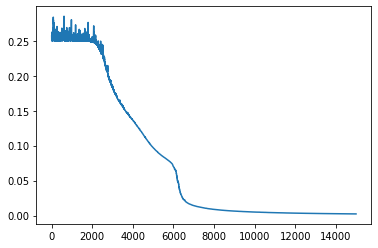

In [ ]:
r_i = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
r_d = np.array([[0,1,1,0]])

# Reshape array as matrix, error happening when working with new documentation

r_i = np.asmatrix(r_i)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 4, nSalidas = 1, Learning_Speed = 0.7, tSteps = 15000, rI = r_i, rD = r_d)

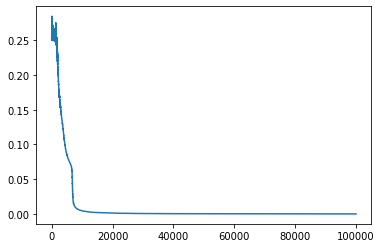

In [ ]:
r_i = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
r_d = np.array([[0,1,1,0]])

# Reshape array as matrix, error happening when working with new documentation

r_i = np.asmatrix(r_i)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 4, nSalidas = 1, Learning_Speed = 0.7, tSteps = 100000, rI = r_i, rD = r_d)


# Naranjas y melones

---

 * Modelo con Entrada Base

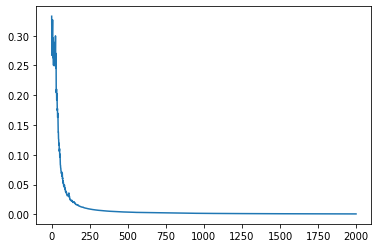

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

# Reshape array as matrix, error happening when working with new documentation

r_i = np.asmatrix(r_i)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.7, tSteps=2000, rI = r_i, rD = r_d)

# Learning Speed Of 0.7

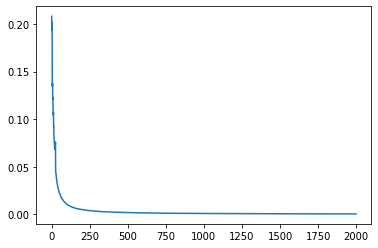

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

# Reshape array as matrix, error happening when working with new documentation

r_i = np.asmatrix(r_i)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.7, tSteps=2000, rI = r_i, rD = r_d)

# Learning Speed Of 0.3

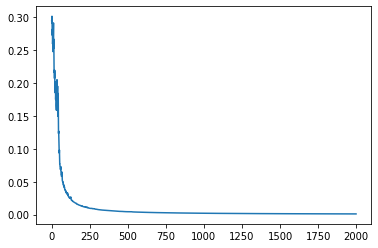

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

# Reshape array as matrix, error happening when working with new documentation

r_i = np.asmatrix(r_i)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.3, tSteps=2000, rI = r_i, rD = r_d)

# Learning Speed Of 1

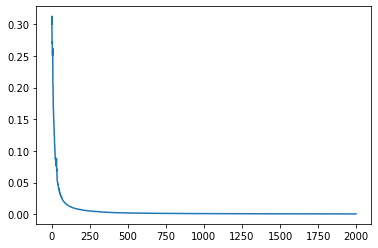

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

# Reshape array as matrix, error happening when working with new documentation

r_i = np.asmatrix(r_i)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 1, tSteps=2000, rI = r_i, rD = r_d)

# Learning Speed Of 0

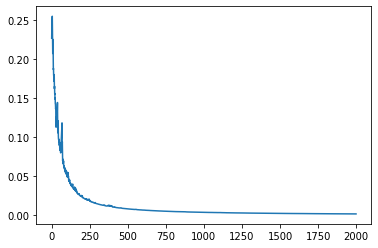

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

# Reshape array as matrix, error happening when working with new documentation

r_i = np.asmatrix(r_i)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0, tSteps=2000, rI = r_i, rD = r_d)

* Modelo 1(2 entradas (sin bia)
  - Normalización estándar
  - Probar con los ejemplos solicitados
  - Probar con por lo menos 3 valores de velocidad de aprendizaje (puede ser 0-1, 0.7,0.3)


# Learning Speed Of 0.7

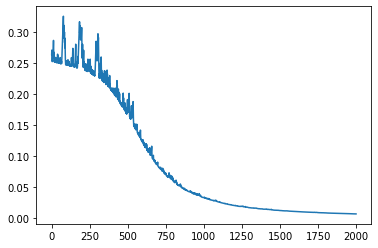

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_stan = r_i / np.linalg.norm(r_i)

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.7, tSteps=2000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 0.3

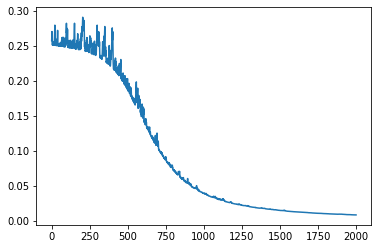

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_stan = r_i / np.linalg.norm(r_i)

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.3, tSteps=2000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 1

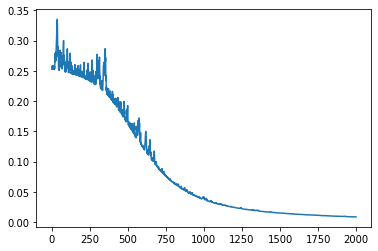

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_stan = r_i / np.linalg.norm(r_i)

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 1, tSteps=2000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 0

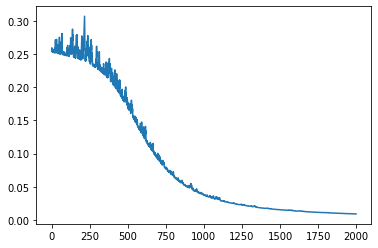

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_stan = r_i / np.linalg.norm(r_i)

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0, tSteps=2000, rI = r_i_stan, rD = r_d)

* Modelo 2 (2 entradas (sin bia)
  - Normalización límite inferior y superior
  - Probar con los ejemplos solicitado
  - Probar con por lo menos 3 valores de velocidad de aprendizaje (puede ser 0-1, 0.7,0.3)


# Learning Speed Of 0.7

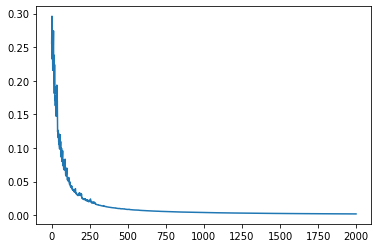

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_norm = min_max_normalization(r_i, a, b)

# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)


Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.7, tSteps=2000, rI = r_i_norm, rD = r_d)


# Learning Speed Of 0.3

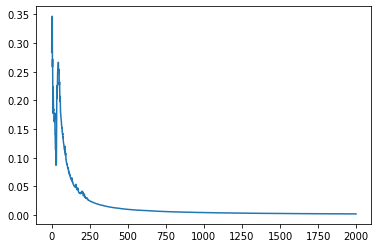

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_norm = min_max_normalization(r_i, a, b)


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)


Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.3, tSteps=2000, rI = r_i_norm, rD = r_d)


# Learning Speed Of 1

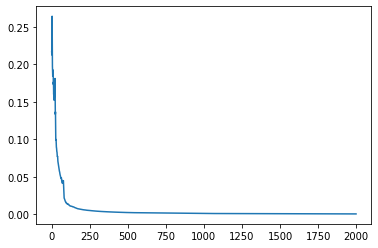

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_norm = min_max_normalization(r_i, a, b)


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 1, tSteps=2000, rI = r_i_norm, rD = r_d)


# Learning Speed Of 0

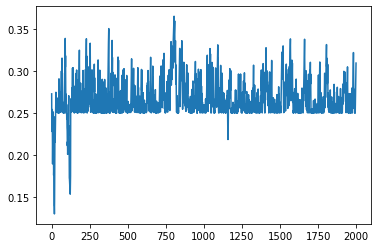

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_norm = min_max_normalization(r_i, a, b)


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 0, tSteps=2000, rI = r_i_norm, rD = r_d)

* Modelo 3 (3 entradas ( bia)
  - Normalización estándar
  - Probar con los ejemplos solicitados
  - Probar con por lo menos 3 valores de velocidad de aprendizaje (puede ser 0-1, 0.7,0.3)

# Learning Speed Of 0.7

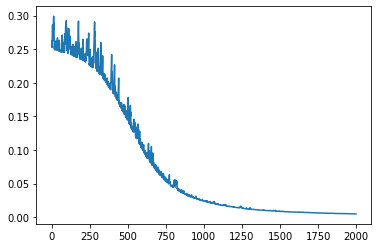

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_stan = r_i / np.linalg.norm(r_i)

r_i_stan = np.r_[r_i_stan, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)


Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.7, tSteps=2000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 0.3

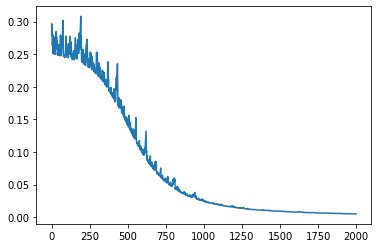

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_stan = r_i / np.linalg.norm(r_i)

r_i_stan = np.r_[r_i_stan, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.3, tSteps=2000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 1

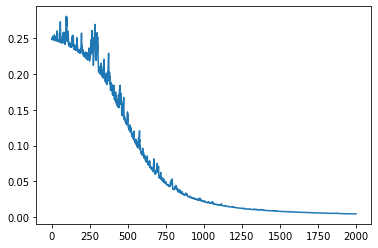

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_stan = r_i / np.linalg.norm(r_i)

r_i_stan = np.r_[r_i_stan, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 1, tSteps=2000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 0

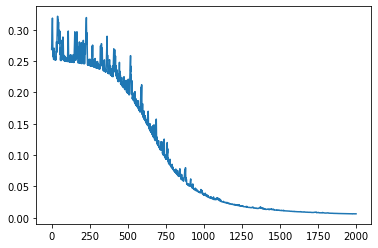

In [ ]:
r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_stan = r_i / np.linalg.norm(r_i)

r_i_stan = np.r_[r_i_stan, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 0, tSteps=2000, rI = r_i_stan, rD = r_d)

* Modelo 4 (3 entradas (bia)
  - Normalización límite inferior y superior
  - Probar con los ejemplos solicitados
  - Probar con por lo menos 3 valores de velocidad de aprendizaje (puede ser 0-1, 0.7,0.3)

# Learning Speed Of 0.7

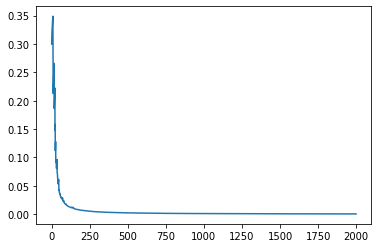

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.7, tSteps=2000, rI = r_i_norm, rD = r_d)

# Learning Speed Of 0.3

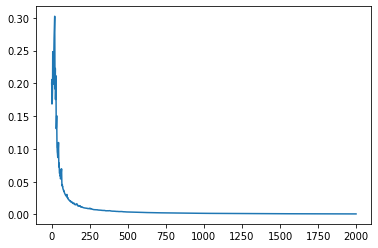

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 0.3, tSteps=2000, rI = r_i_norm, rD = r_d)

# Learning Speed Of 1

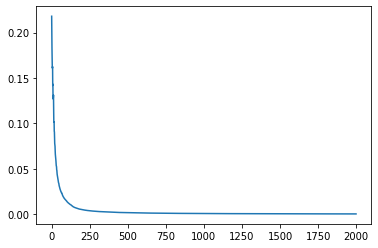

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 1, tSteps=2000, rI = r_i_norm, rD = r_d)

# Learning Speed Of 0

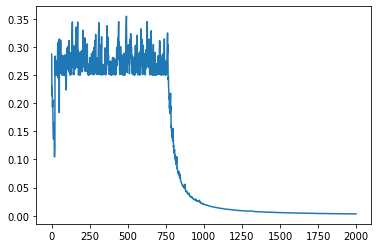

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 0, tSteps=2000, rI = r_i_norm, rD = r_d)

En los ejercicios propuestos de las Modelos y de las Narajas y Melones realizar los siguiente:
#Modelos:


---
 * Modelo con Entrada Base

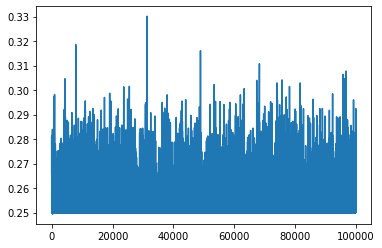

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

# Reshape array as matrix, error happening when working with new documentation

r_i = np.asmatrix(r_i)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.7, tSteps = 100000, rI = r_i, rD = r_d)


* Modelo 1(2 entradas (sin bia)
  - Normalización estándar
  - Probar con los ejemplos solicitados
  - Probar con por lo menos 3 valores de velocidad de aprendizaje (puede ser 0-1, 0.7,0.3)

# Learning Speed of 0.7

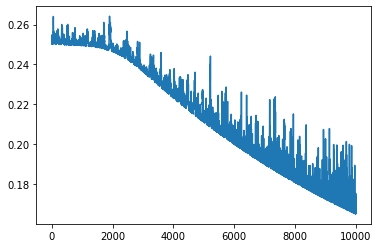

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

r_i_stan = r_i / np.linalg.norm(r_i)

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.7, tSteps=10000, rI = r_i_stan, rD = r_d)

# Learning Speed of 0.3

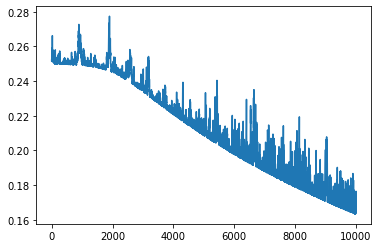

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

r_i_stan = r_i / np.linalg.norm(r_i)

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.3, tSteps=10000, rI = r_i_stan, rD = r_d)

# Learning Speed of 1

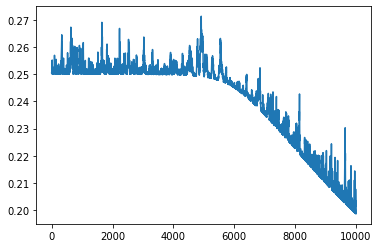

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
#r_d = np.array([[1, 1, 1, 0, 0, 0]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

r_i_stan = r_i / np.linalg.norm(r_i)

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)


Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 1, tSteps=10000, rI = r_i_stan, rD = r_d)

# Learning Speed of 0

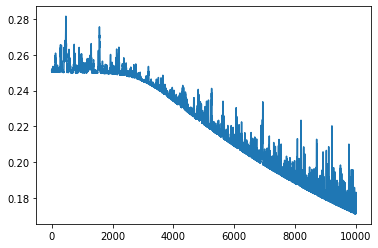

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

r_i_stan = r_i / np.linalg.norm(r_i)

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 0, tSteps=10000, rI = r_i_stan, rD = r_d)

* Modelo 2 (2 entradas (sin bia)
  - Normalización límite inferior y superior
  - Probar con los ejemplos solicitado
  - Probar con por lo menos 3 valores de velocidad de aprendizaje (puede ser 0-1, 0.7,0.3)

# Learning Speed of 0.7




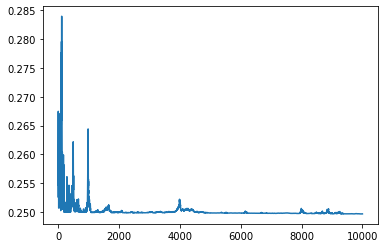

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])


r_i_norm = min_max_normalization(r_i, a, b)


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.7, tSteps=10000, rI = r_i_norm, rD = r_d)
#Neural_Network(nEntradas = 2, nOcultas = 3, nSalidas = 1, Learning_Speed = 0.7, tSteps=10000, rI = r_i_norm, rD = r_d)

# Learning Speed of 0.3

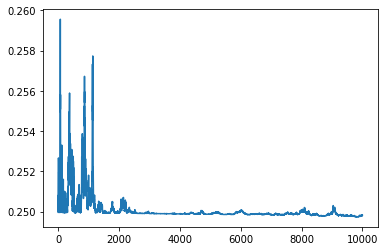

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])


r_i_norm = min_max_normalization(r_i, a, b)


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.3, tSteps=10000, rI = r_i_norm, rD = r_d)

# Learning Speed of 1

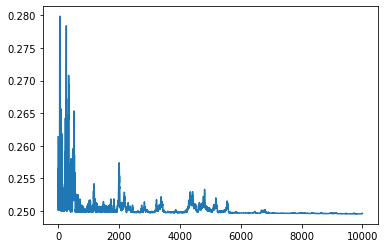

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])


r_i_norm = min_max_normalization(r_i, a, b)


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 6, nSalidas = 1, Learning_Speed = 1, tSteps=10000, rI = r_i_norm, rD = r_d)

# Learning Speed of 0

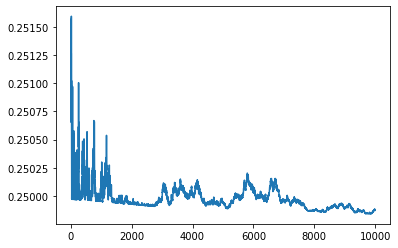

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])


r_i_norm = min_max_normalization(r_i, a, b)


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 0, tSteps=10000, rI = r_i_norm, rD = r_d)

* Modelo 3 (3 entradas ( bia)
  - Normalización estándar
  - Probar con los ejemplos solicitados
  - Probar con por lo menos 3 valores de velocidad de aprendizaje (puede ser 0-1, 0.7,0.3)

# Learning Speed Of 0.7

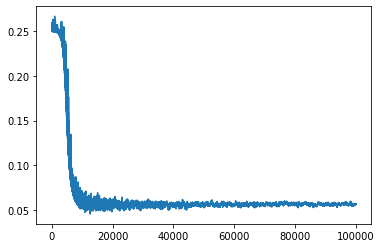

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_stan = r_i / np.linalg.norm(r_i)

r_i_stan = np.r_[r_i_stan, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.7, tSteps=100000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 0.3

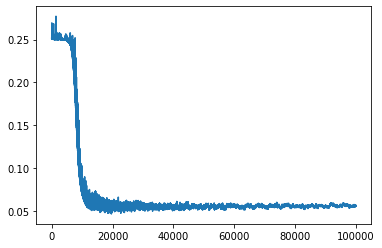

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_stan = r_i / np.linalg.norm(r_i)

r_i_stan = np.r_[r_i_stan, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.3, tSteps= 100000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 1

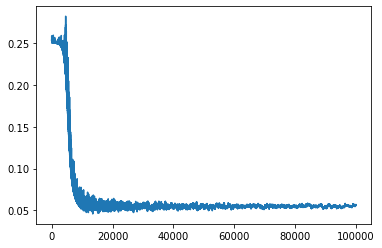

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_stan = r_i / np.linalg.norm(r_i)

r_i_stan = np.r_[r_i_stan, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 2, nSalidas = 1, Learning_Speed = 1, tSteps=100000, rI = r_i_stan, rD = r_d)

# Learning Speed Of 0

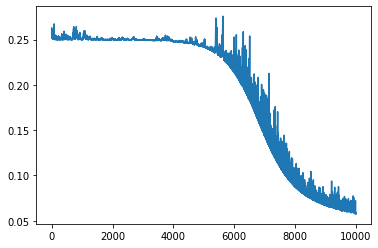

In [ ]:
r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_stan = r_i / np.linalg.norm(r_i)

r_i_stan = np.r_[r_i_stan, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_stan = np.asmatrix(r_i_stan)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 2, nSalidas = 1, Learning_Speed = 0, tSteps=10000, rI = r_i_stan, rD = r_d)

* Modelo 4 (3 entradas (bia)
  - Normalización límite inferior y superior
  - Probar con los ejemplos solicitados
  - Probar con por lo menos 3 valores de velocidad de aprendizaje (puede ser 0-1, 0.7,0.3)

# Learning Speed Of 0.7

[[1.7655991  1.83417483 1.77087415 1.85       1.78142427 1.79724943]
 [1.50073851 1.50026375 1.50084401 1.5        1.50052751 1.5003165 ]
 [1.         1.         1.         1.         1.         1.        ]]


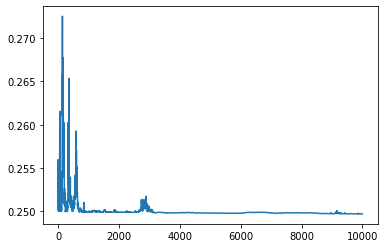

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]

print(r_i_norm)

# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.7, tSteps=10000, rI = r_i_norm, rD = r_d)

# Learning Speed Of 0.3

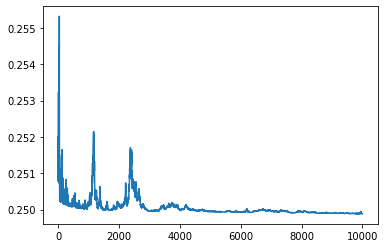

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 2, nSalidas = 1, Learning_Speed = 0.3, tSteps=10000, rI = r_i_norm, rD = r_d)

# Learning Speed Of 1

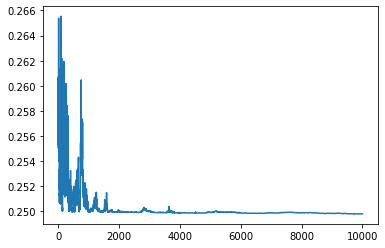

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]

# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 2, nSalidas = 1, Learning_Speed = 1, tSteps=10000, rI = r_i_norm, rD = r_d)

# Learning Speed Of 0

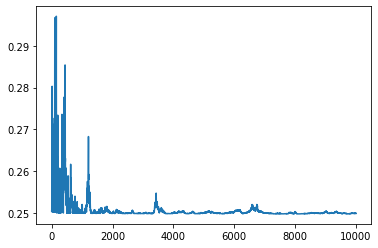

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 6, nSalidas = 1, Learning_Speed = 0, tSteps=10000, rI = r_i_norm, rD = r_d)

---
# Conclusión

Realice una conclusión analizando todos los modelos indicando cual fue el que mejor. Puede probar los modelos modificando incluso la cantidad de neuronas en la capa oculta y el número de capas ocultas, pruebe también a cambiar la velocidad de aprendizaje.

# Pruebas de Número de Capas Ocultas

* Modelos

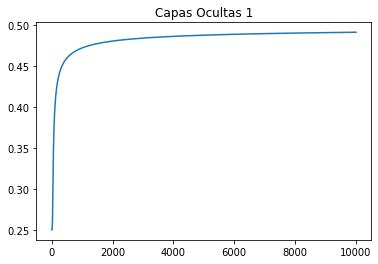

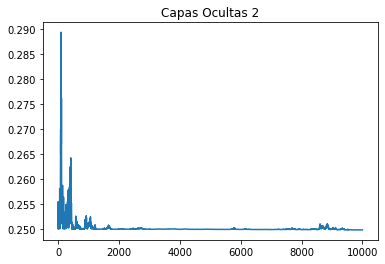

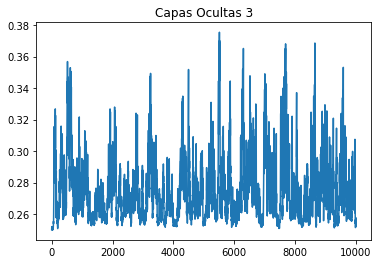

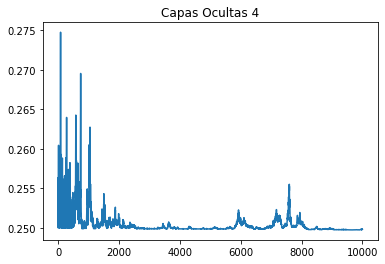

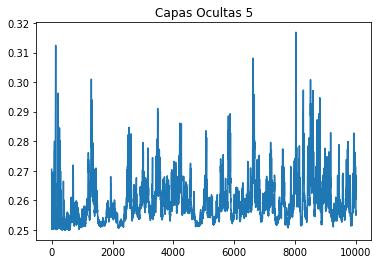

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

for i in range(1, 6):
  plt.title('Capas Ocultas ' + str(i))
  Neural_Network(nEntradas = 3, nOcultas = i, nSalidas = 1, Learning_Speed = 1, tSteps=10000, rI = r_i_norm, rD = r_d)

* Melones y Naranjas



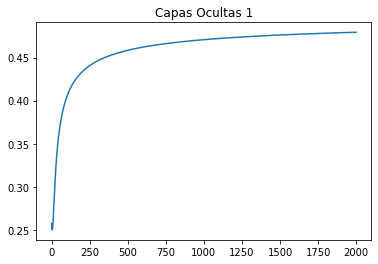

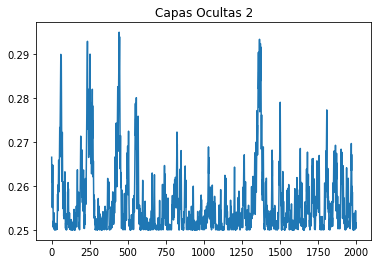

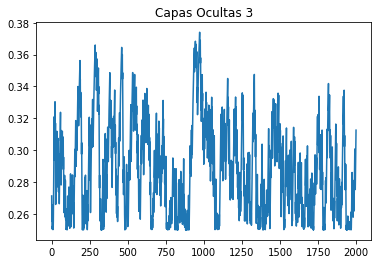

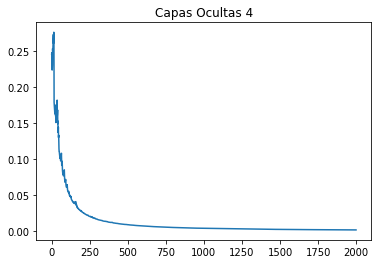

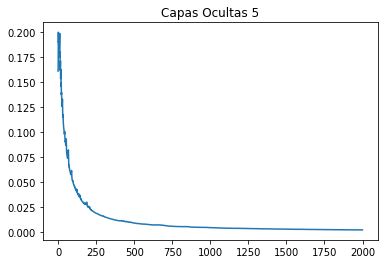

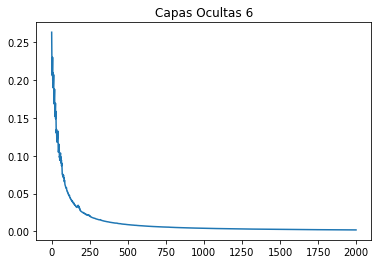

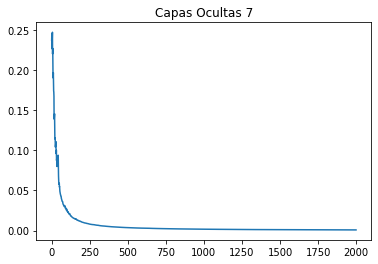

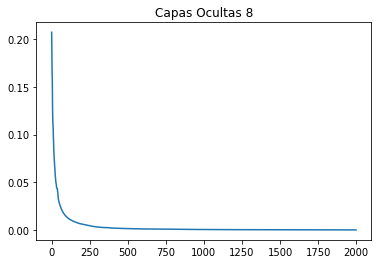

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_norm = min_max_normalization(r_i, a, b)

# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)


for i in range(1, 9):
  plt.title('Capas Ocultas ' + str(i))
  Neural_Network(nEntradas = 2, nOcultas = i, nSalidas = 1, Learning_Speed = 0.7, tSteps=2000, rI = r_i_norm, rD = r_d)

# Prueba de Modelos Con BIA y sin BIA

#MODELOS

* Con BIA (Este es el Mejor Modelo para este ejercicio)

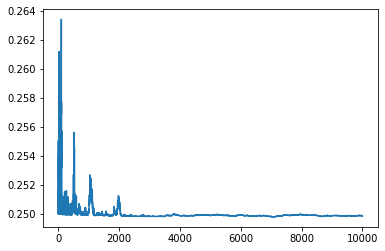

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 2, nSalidas = 1, Learning_Speed = 1, tSteps=10000, rI = r_i_norm, rD = r_d)

* Sin BIA

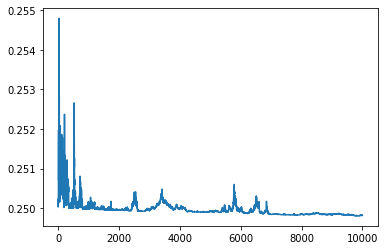

In [ ]:
a, b = 1.50, 1.85

r_i = np.array([[52, 65, 53, 68, 55, 58], [1.79, 1.70, 1.81, 1.65, 1.75, 1.71]])
r_d = np.array([[1, 0, 1, 0, 1, 0]])


r_i_norm = min_max_normalization(r_i, a, b)


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 2, nSalidas = 1, Learning_Speed = 1, tSteps=10000, rI = r_i_norm, rD = r_d)

# Melones y Naranjas

* Sin BIA

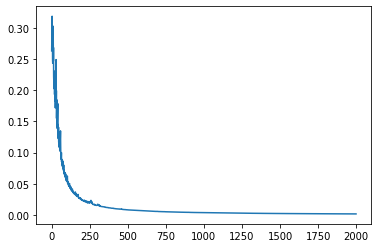

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

r_i_norm = min_max_normalization(r_i, a, b)

# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 2, nOcultas = 8, nSalidas = 1, Learning_Speed = 1, tSteps=2000, rI = r_i_norm, rD = r_d)

* Con BIA (Este es el Mejor Modelo para este ejercicio)

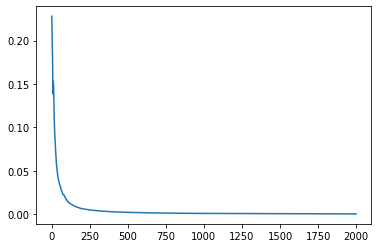

In [ ]:
a, b = 0, 250

r_i = np.array([[10, 20, 8, 26, 7, 24, 15, 19], [200, 30, 150, 30, 170, 32, 250, 31]])
r_d = np.array([[1, 0, 1, 0, 1, 0, 1, 0]])

row = np.array([1, 1, 1, 1, 1, 1, 1, 1])

r_i_norm = min_max_normalization(r_i, a, b)

r_i_norm = np.r_[r_i_norm, [row]]


# Reshape array as matrix, error happening when working with new documentation

r_i_norm = np.asmatrix(r_i_norm)
r_d = np.asmatrix(r_d)

Neural_Network(nEntradas = 3, nOcultas = 8, nSalidas = 1, Learning_Speed = 1, tSteps=2000, rI = r_i_norm, rD = r_d)

---
En conclusión, podemos determinar que al momento de implementar la BIAs en cualquiera de nuestros modelos tenemos un resultado mejor, ya que no estamos dando paso a la arbitrariedad. Al momento de añadir los valores de uno según nuestras entradas después de normalizar quitamos el "Favoritismo" de seleccionar las opciones con mayor peso. De esta manera, podemos determinar que también la velocidad en la que nuestro modelo aprende es un factor importante que nos permite tener mejores resultados en menor tiempo posible.
Con respecto a las capas ocultas, según investigado en internet no hay un mejor número para utilizar, esto varia dependiendo el modelo y es cuestión de prueba y error. Sin embargo, en internet recomiendan el uso de 2 capas ocultas, ya que este número resuelve la mayoria de problemas.

Como se puede observar en las gráficos los modelos con BIA nos dan un mejor resultado en menor numero de pasos. Al igual que la mejor normalización de datos es haciendo uso de la Min y Max (limite inferior y superior) a diferencia de la estandarización de datos, porque nos da una oscilación más uniforme de los resultados a medida que avanzamos con los pasos.

---


# Updated code to run with newest documentation (not working properly!)

In [ ]:
def min_max_normalization(x, a, b):
  return a + ((x-x.min())*(b-a)) / (x.max() - x.min())

def Neural_Network(nEntradas = 2, nOcultas = 4, nSalidas = 1, Learning_Speed = 0.7, tSteps = 10000, rI = None, rD = None):
  #modelo de la red neuronas: entradas, ocultas y salidas
  N_entrada = nEntradas; N_ocultas = nOcultas; N_salida = nSalidas
  #N_entradaBias = 3

  # Inputs
  r_i = rI

  # outputs
  r_d = rD

  # weights for H
  w_h = np.random.rand(N_ocultas, N_entrada) - 0.5

  # weights for O
  w_o = np.random.rand(N_salida, N_ocultas) - 0.5

  # number of training repetitions

  training_steps = tSteps

  mse = [] # array to store best results

  for i in range(training_steps):
    i = np.floor(4 * np.random.rand()).astype('int')

    '''
    print(r_i[:,i])
    print('W_H: ', w_h)

    print('S_H: ', (w_h * r_i[:,i]))
    '''

    s_h = w_h.dot(r_i[:,i])

    #print('s_h: ', s_h)

    r_h = 1 / (1 + np.exp(-s_h))

    # network outputs
    s_o = w_o.dot(r_h)

    r_o = 1 / (1 + np.exp(-s_o))


    '''
    print('R_O: ', r_o)
    print('S_O: ', s_o)
    '''

    # error calculation
    error = r_d[:,i] - r_o

    d_o = (r_o * (1 - r_o)) * error

    # Matrices multiplication

    d_h = np.multiply(np.multiply(r_h, (1 - r_h)), w_o.T.dot(d_o))

    w_o = w_o + Learning_Speed * r_h.dot(d_o.T).T

    w_h = w_h + Learning_Speed * r_i[:,i].reshape(1, 2).dot(d_h.T).T

    #print(r_i[:,i])

    # Test

    test_h = 1/(1+np.exp(np.dot(-w_h, r_i)))
    test_o = 1/(1+np.exp(np.dot(-w_o, test_h)))

    # Output
    mse += [mean_squared_error(r_d,test_o)]


  plt.plot(mse)
  plt.show()